In [445]:
#import basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [446]:
#import dataset
car=pd.read_csv('CarPrice_Assignment.csv')

In [447]:
#Read dataset
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [448]:
#check null values in each columns
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

We can see that dataset is fully clean and there is no null values present

In [449]:
print("Car dataframe shape is: \n",car.shape)
print("\n\n")
print("datatype of car dataframe is \n",car.info())
print("\n\n")
print("Describe of car dataframe is \n",car.describe())

Car dataframe shape is: 
 (205, 26)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower   

split car manufacturer and model

In [450]:

def splitcar(x):
    return(x.split(" ")[0])



In [451]:
car['car']=car['CarName'].apply(splitcar)

In [452]:
#split Carname column
car.drop(['CarName'],axis=1,inplace=True)

In [453]:
car.shape
#Now I can see total 27 columns are present including target variable price.
#I have to find impotant variables contributing in car price 

(205, 26)

In [454]:
#add new derived column
#stroke ratio=stroke/boreratio
#area=length*width*height

#car['stroke_ratio']=car['stroke']/car['boreratio']
#car['area']=car['carlength']*car['carwidth']*car['carheight']
#car['area']=round(car['area'])
#I created model using area and stroke ratio but that is not helpful.Thus removing those columns again

# Data Cleaning

In [455]:
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [456]:
car['car'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

below name error I can see which we need to clean first 
'Nissan', 'nissan'
'porsche', 'porcshce',
'toyota', 'toyouta'
'vokswagen', 'volkswagen', 'vw'
'maxda', 'mazda'

In [457]:
#change everything to lower case in car column first
car['car']=car['car'].str.lower()

In [458]:
car['car'].unique()
#nissan naming issue is solved 

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [459]:
car['car'].replace(to_replace='porcshce',value='porsche',inplace=True)
car['car'].replace(to_replace='toyouta',value='toyota',inplace=True)
car['car'].replace(to_replace='vokswagen',value='volkswagen',inplace=True)
car['car'].replace(to_replace='vw',value='volkswagen',inplace=True)
car['car'].replace(to_replace='maxda',value='mazda',inplace=True)


In [460]:
car['car'].nunique()

22

In [461]:
car.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'car'],
      dtype='object')

In [462]:
#car['car'] is now clear. Spelling mistakes taken care already

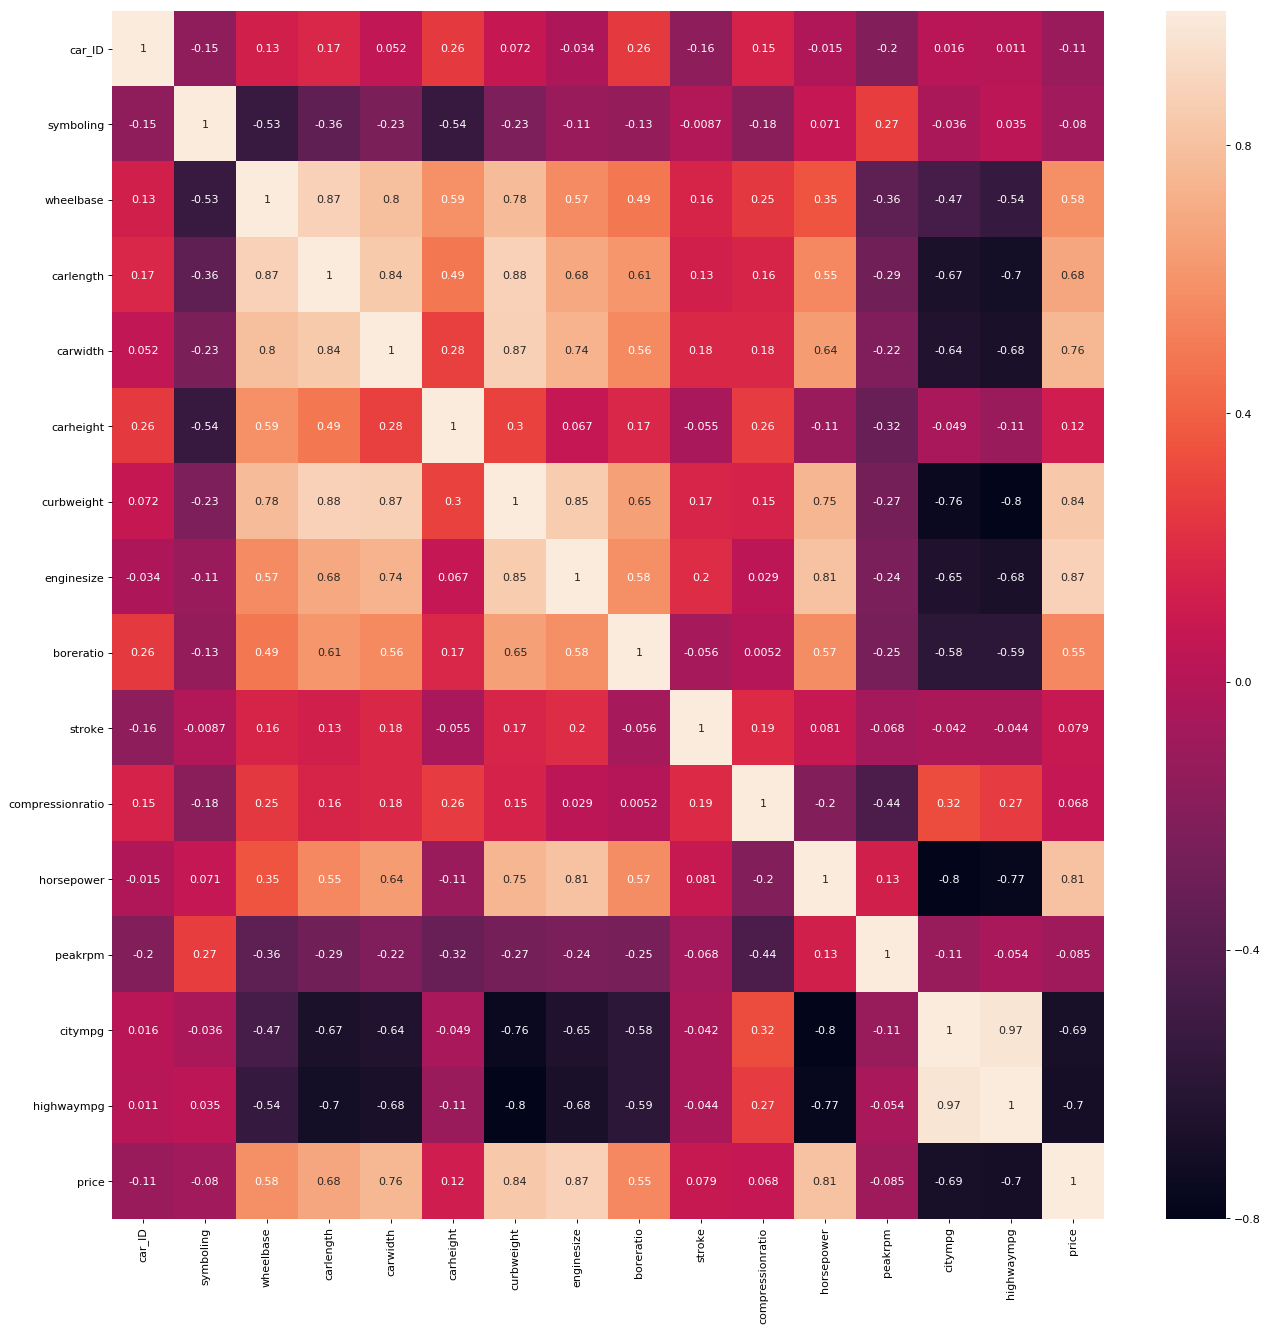

In [463]:
plt.figure(figsize=(20,20),dpi=80)
sns.heatmap(car.corr(),annot=True)
#'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype' , 'horsepower' is highly correlated with price 
#But we don't know if one variable is influening other variable or not.

In [464]:
car.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [465]:
##take care of dummy variables
var=['car','fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation','enginetype', 'cylindernumber','fuelsystem']
dummy=pd.get_dummies(car[var],drop_first=True)
dummy.head()
car=pd.concat([car,dummy],axis=1)
        

In [466]:
car.shape

(205, 76)

In [467]:
#drop redundant columns
car.drop(var,axis=1,inplace=True)

In [468]:
print(car.columns)
print(car.shape)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'car_audi', 'car_bmw', 'car_buick', 'car_chevrolet',
       'car_dodge', 'car_honda', 'car_isuzu', 'car_jaguar', 'car_mazda',
       'car_mercury', 'car_mitsubishi', 'car_nissan', 'car_peugeot',
       'car_plymouth', 'car_porsche', 'car_renault', 'car_saab', 'car_subaru',
       'car_toyota', 'car_volkswagen', 'car_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylinder

In [469]:
#split dataset to train and test dataset
from sklearn.model_selection import train_test_split

In [470]:
df_train,df_test=train_test_split(car,train_size=0.7,test_size=0.3,random_state=100)
np.random.seed(0)

In [471]:
#scale numeric columns
scale_columns=['symboling','wheelbase', 'carlength', 'carwidth','carheight', 'curbweight','enginesize','boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_train[scale_columns]=scaler.fit_transform(df_train[scale_columns])

C:\Users\prabal.paul\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\prabal.paul\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [472]:
df_train[scale_columns].head()
# now I can see that all the numeric column values within 0 and 1
#Lets see variation of these variables

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131


In [473]:
df_train[scale_columns].describe(percentiles=[0.25,0.40,0.50,0.75,0.90])
#Data  looks good as mean and median values doesn't differ much

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298
40%,0.400000,0.313793,0.463089,0.388333,0.442478,0.314430,0.177358,0.404762,0.525253,0.125000,0.154167,0.346939,0.300000,0.324324,0.104545
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479
90%,1.000000,0.734483,0.778211,0.708333,0.766372,0.684251,0.452830,0.746032,0.681818,0.182500,0.450000,0.640816,0.500000,0.567568,0.482802
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [474]:
#split x and y dataset of train df
y_train=df_train.pop('price')
x_train=df_train



In [475]:
df_train.shape

(143, 65)

In [476]:
df_train.shape
#total 95 columns are present and getting useful data is pretty difficut.
#Let's apply automatic feature selection REF here
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [477]:
from sklearn.feature_selection import RFE

rfe=RFE(lr,10)
rfe.fit(x_train,y_train)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [478]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 51),
 ('symboling', False, 52),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 25),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 39),
 ('highwaympg', False, 26),
 ('car_audi', False, 37),
 ('car_bmw', True, 1),
 ('car_buick', False, 38),
 ('car_chevrolet', False, 23),
 ('car_dodge', False, 20),
 ('car_honda', False, 22),
 ('car_isuzu', False, 50),
 ('car_jaguar', False, 27),
 ('car_mazda', False, 44),
 ('car_mercury', False, 54),
 ('car_mitsubishi', False, 13),
 ('car_nissan', False, 43),
 ('car_peugeot', False, 6),
 ('car_plymouth', False, 19),
 ('car_porsche', True, 1),
 ('car_renault', False, 40),
 ('car_saab', False, 9),
 ('car_subaru', False, 11),
 ('car_toyota', False, 45),
 ('car_volkswagen', False, 46),
 ('car_volvo', False, 8),
 ('fueltype_gas', F

In [479]:
#Check columns supported by RFE
cols=x_train.columns[rfe.support_]
x_train0=x_train[cols]


In [480]:
x_train0[cols].columns

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'car_bmw',
       'car_porsche', 'enginelocation_rear', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [481]:
#use statsmodel to check accuracy  using RFE selected 10 columns
import statsmodels.api as sm
x_train_lm0=sm.add_constant(x_train0)
lrm0=sm.OLS(y_train,x_train_lm0).fit()

print(lrm0.summary())

#lets check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=x_train0.columns
vif['VIF']=[variance_inflation_factor(x_train0.values,i) for i in range(x_train0.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False,inplace=True)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           1.21e-64
Time:                        01:20:05   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. So let's start by dropping that.

In [482]:

#first model after removing curbweight as it has highest VIF

cols1=['carwidth', 'enginesize', 'boreratio', 'car_bmw',
       'car_porsche', 'enginelocation_rear', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two']

x_train1=x_train[cols1]

x_train_lm1=sm.add_constant(x_train1)
lrm1=sm.OLS(y_train,x_train_lm1).fit()
print(lrm1.summary())

vif=pd.DataFrame()
vif['features']=x_train1.columns
vif['VIF']=[variance_inflation_factor(x_train1.values,i) for i in range(x_train1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     137.4
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           7.17e-63
Time:                        01:20:05   Log-Likelihood:                 183.70
No. Observations:                 143   AIC:                            -347.4
Df Residuals:                     133   BIC:                            -317.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.17

We can see that adjusted R2 , AIC , BIC decreased but VIF value for others in good shape.
Lets try other combination

In [483]:

#first model after removing carwidth as it has 2nd highest VIF after 1st model
cols2=[ 'curbweight', 'enginesize', 'boreratio', 'car_bmw',
       'car_porsche', 'enginelocation_rear', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two']

x_train2=x_train[cols2]

x_train_lm2=sm.add_constant(x_train2)
lrm2=sm.OLS(y_train,x_train_lm2).fit()
print(lrm2.summary())

vif=pd.DataFrame()
vif['features']=x_train2.columns
vif['VIF']=[variance_inflation_factor(x_train2.values,i) for i in range(x_train2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     127.5
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           6.23e-61
Time:                        01:20:05   Log-Likelihood:                 178.87
No. Observations:                 143   AIC:                            -337.7
Df Residuals:                     133   BIC:                            -308.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

In [484]:

#first model after removing enginsize as it has 3rd highest VIF after 1st model

cols3=['carwidth', 'curbweight', 'boreratio', 'car_bmw',
       'car_porsche', 'enginelocation_rear', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two']

x_train3=x_train[cols3]

x_train_lm3=sm.add_constant(x_train3)
lrm3=sm.OLS(y_train,x_train_lm3).fit()
print(lrm3.summary())

vif=pd.DataFrame()
vif['features']=x_train3.columns
vif['VIF']=[variance_inflation_factor(x_train3.values,i) for i in range(x_train3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     118.1
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           5.65e-59
Time:                        01:20:05   Log-Likelihood:                 174.00
No. Observations:                 143   AIC:                            -328.0
Df Residuals:                     133   BIC:                            -298.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

We can see that adjusted R2 , AIC , BIC decreased but VIF value for others is not as good as 2nd model.
Lets try other combination

In [485]:
#model after removing carwidth  and curbweight 
cols4=[ 'enginesize', 'boreratio', 'car_bmw',
       'car_porsche', 'enginelocation_rear', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two']

x_train4=x_train[cols4]

x_train_lm4=sm.add_constant(x_train4)
lrm4=sm.OLS(y_train,x_train_lm4).fit()
print(lrm4.summary())

vif=pd.DataFrame()
vif['features']=x_train4.columns
vif['VIF']=[variance_inflation_factor(x_train4.values,i) for i in range(x_train4.shape[1])]
vif['VIF']=round(vif['VIF'],4)
vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     97.25
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           5.38e-52
Time:                        01:20:05   Log-Likelihood:                 154.07
No. Observations:                 143   AIC:                            -290.1
Df Residuals:                     134   BIC:                            -263.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

We can see that adjusted R2 , AIC , BIC decreased but VIF value is almost in range.
Lets try other combination for better p value and better VIF

In [486]:
#model after removing carwidth ,curbweight , boreratio 
cols5=[ 'enginesize', 'car_bmw',
       'car_porsche', 'enginelocation_rear', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two']
	   
x_train5=x_train[cols5]

x_train_lm5=sm.add_constant(x_train5)
lrm5=sm.OLS(y_train,x_train_lm5).fit()
print(lrm5.summary())

vif=pd.DataFrame()
vif['features']=x_train5.columns
vif['VIF']=[variance_inflation_factor(x_train5.values,i) for i in range(x_train5.shape[1])]
vif['VIF']=round(vif['VIF'],5)
vif.sort_values(by='VIF',ascending=False)
print(vif)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           4.92e-53
Time:                        01:20:05   Log-Likelihood:                 154.07
No. Observations:                 143   AIC:                            -292.1
Df Residuals:                     135   BIC:                            -268.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

We can see that adjusted R2 , AIC , BIC decreased but VIF value is under 2.
But few variables p value is insignificant.
Lets delete those columns one by one


In [487]:
#model after removing carwidth  and curbweight , boreratio ,enginelocation_rear
cols6=[ 'enginesize', 'car_bmw',
       'car_porsche','cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two']

x_train6=x_train[cols6]

x_train_lm6=sm.add_constant(x_train6)
lrm6=sm.OLS(y_train,x_train_lm6).fit()
print(lrm6.summary())

vif=pd.DataFrame()
vif['features']=x_train6.columns
vif['VIF']=[variance_inflation_factor(x_train6.values,i) for i in range(x_train6.shape[1])]
vif['VIF']=round(vif['VIF'],6)
vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     130.0
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           8.14e-54
Time:                        01:20:05   Log-Likelihood:                 153.34
No. Observations:                 143   AIC:                            -292.7
Df Residuals:                     136   BIC:                            -271.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

We can see that adjusted R2 , AIC , BIC decreased but VIF value for others in good shape.
still I can see p value of cylindernumber_three  is bit insignificant compared to others.
Lets eliminate it and try again

In [488]:
#model after removing carwidth  and curbweight , boreratio ,enginelocation_rear, cylindernumber_three
cols7=[ 'enginesize', 'car_bmw',
       'car_porsche',
       'cylindernumber_twelve', 'cylindernumber_two']
x_train7=x_train[cols7]

x_train_lm7=sm.add_constant(x_train7)
lrm7=sm.OLS(y_train,x_train_lm7).fit()
print(lrm7.summary())

vif=pd.DataFrame()
vif['features']=x_train7.columns
vif['VIF']=[variance_inflation_factor(x_train7.values,i) for i in range(x_train7.shape[1])]
vif['VIF']=round(vif['VIF'],7)
vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.3
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           1.24e-54
Time:                        01:20:06   Log-Likelihood:                 152.61
No. Observations:                 143   AIC:                            -293.2
Df Residuals:                     137   BIC:                            -275.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

This model looks great and I am going ahead for prediction for this model

In [489]:
#making prediction using lrm7
from sklearn.metrics import mean_squared_error,r2_score
y_predicted_price=lrm7.predict(x_train_lm7)
mse = mean_squared_error(y_train, y_predicted_price)
r_squared = r2_score(y_train, y_predicted_price)
print("mean square error is: ",mse)
print("r2 square value is: ",r_squared)


mean square error is:  0.006927766816795251
r2 square value is:  0.8500268036485336


Text(0,0.5,'price')

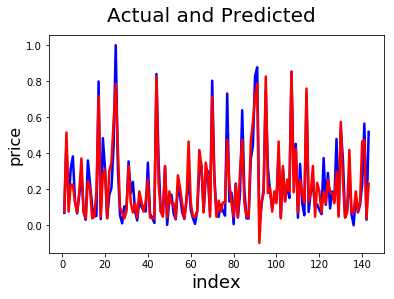

In [490]:
#Actual vs Predicted
c = [i for i in range(1,144,1)]
fig = plt.figure()
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_predicted_price, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('index', fontsize=18)                               # X-label
plt.ylabel('price', fontsize=16)                               # Y-label

#so we can see most price prediction is matching with actual data

C:\Users\prabal.paul\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


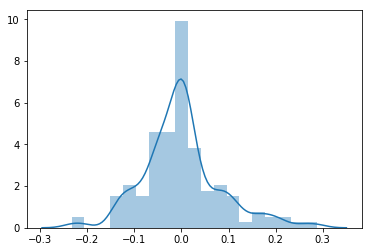

In [491]:
#Residual analysis
res=y_train-y_predicted_price
sns.distplot(res)
#we can see mean is at 0 and it is normally distributed

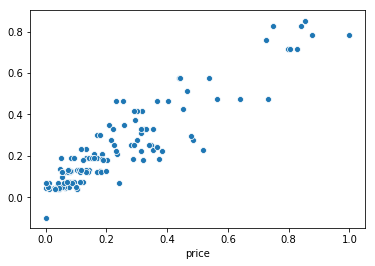

In [492]:
sns.scatterplot(y_train, y_predicted_price)
#We can't see any visible pattern here which is good

In [493]:
#Now use prediction on test model

df_test[scale_columns]=scaler.fit_transform(df_test[scale_columns])



C:\Users\prabal.paul\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\prabal.paul\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [494]:

#split x and y dataset of test df
y_test=df_test.pop('price')
x_test=df_test





In [495]:
x_test7=x_test[cols7]

x_test_lm7=sm.add_constant(x_test7)
y_pred_test=lrm7.predict(x_test_lm7)

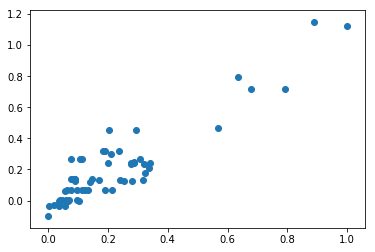

In [496]:
#model evaluation
plt.scatter(y_test,y_pred_test)
#no pattern we can see variables are totally distributed 

Text(0,0.5,'price')

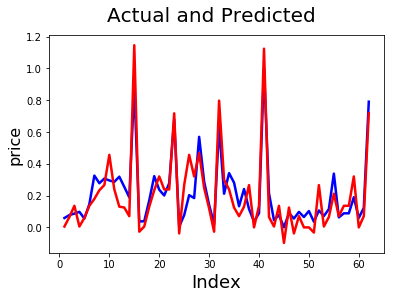

In [497]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_test, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('price', fontsize=16)                               # Y-label

#so we can see most price prediction is matching with actual data
#We can see predict is mostly ok

In [498]:
#mse and r2 value of test dataset
mse = mean_squared_error(y_test, y_pred_test)
r_squared = r2_score(y_test, y_pred_test)
print("mean square error is: ",mse)
print("r2 square value is: ",r_squared)


mean square error is:  0.010281633581742078
r2 square value is:  0.7650771307128431
